In [3]:
# just the usual housekeeping, import libraries, load ligand and DrugBank data
# you load your own set, and DrugBank :)
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem.Draw import IPythonConsole
import csv

with open('../bojicm/compound/chembl395.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [16:23:48] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:26:03] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:26:03] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:26:03] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:26:03] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:26:03] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:26:04] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:26:04] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:26:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:26:04] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:26:04] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [16:26:04] ERROR: Explicit v

RDKit ERROR: [16:26:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
RDKit ERROR: 
RDKit ERROR: [16:26:04] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:26:04] ERROR: Could not sanitize molecule ending on line 616025
RDKit ERROR: [16:26:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:26:04] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:26:04] ERROR: Could not sanitize molecule ending on line 623202
RDKit ERROR: [16:26:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:26:04] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:26:04] ERROR: Could not sanitize molecule ending on line 628065
RDKit ERROR: [16:26:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
RDKit ERROR: 
RDKit ERROR: [16:26:04] Explicit val

In [4]:
def too_many_hbd(mol):
    # takes an RDKit mol instance, returns True if the structure is out of LRO5 bounds
    return rdescriptors.CalcNumLipinskiHBD(mol) > 5

def too_many_hba(mol):
    return rdescriptors.CalcNumLipinskiHBA(mol) > 10

def too_heavy(mol):
    return rdescriptors.CalcExactMolWt(mol) > 500

def too_greasy(mol):
    return Descriptors.MolLogP(mol) > 5

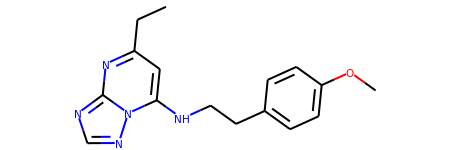

In [5]:
mtor_ligands[15555]

In [6]:
# and see how the structure fares
too_many_hbd(mtor_ligands[15555]), too_many_hba(mtor_ligands[15555]), \
too_heavy(mtor_ligands[15555]), too_greasy(mtor_ligands[15555])

(False, False, False, False)

In [7]:
mtor_ligands_too_many_hbd = [too_many_hbd(l) for l in mtor_ligands] # evaluating whole set
mtor_ligands_too_many_hba = [too_many_hba(l) for l in mtor_ligands]
mtor_ligands_too_heavy = [too_heavy(l) for l in mtor_ligands]
mtor_ligands_too_greasy = [too_greasy(l) for l in mtor_ligands]
sum(mtor_ligands_too_many_hbd), sum(mtor_ligands_too_many_hba), \
sum(mtor_ligands_too_heavy), sum(mtor_ligands_too_greasy), len(mtor_ligands)

(1074, 2508, 6292, 6068, 20127)

In [8]:
import pandas as pd
df = pd.DataFrame(data={'set':'mtor',
                        'too_many_hbd': mtor_ligands_too_many_hbd,
                        'too_many_hba': mtor_ligands_too_many_hba,
                        'too_greasy': mtor_ligands_too_greasy,
                        'too_heavy': mtor_ligands_too_heavy})
df

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy
0,mtor,False,False,False,False
1,mtor,False,True,False,False
2,mtor,False,False,True,True
3,mtor,False,False,False,False
4,mtor,False,False,False,False
...,...,...,...,...,...
20122,mtor,False,True,True,True
20123,mtor,False,False,False,False
20124,mtor,False,False,False,False
20125,mtor,False,False,False,False


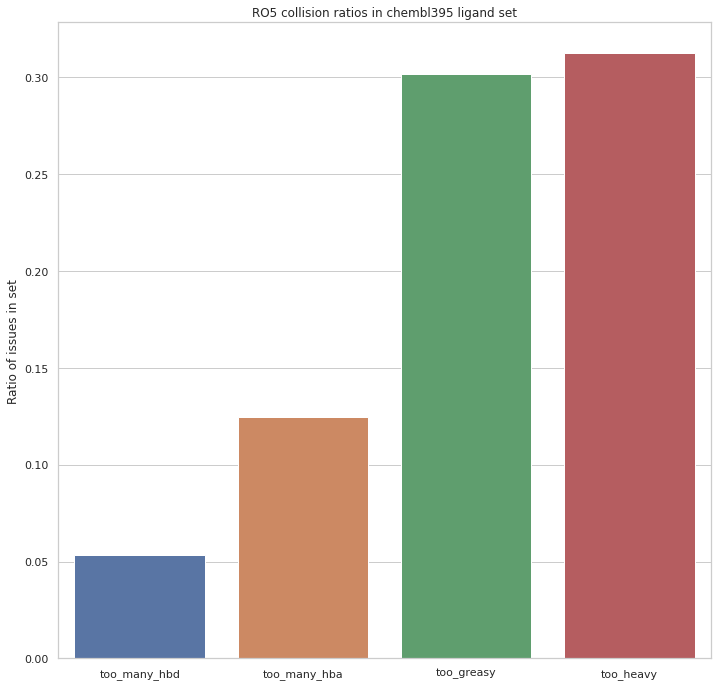

In [9]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df, ci=None)
    p.set_title("RO5 collision ratios in chembl395 ligand set")
    p.set_ylabel("Ratio of issues in set")

In [10]:
def ro5_violations(mol):
    # takes RDKit mol, return how many rules it actually violates
    return sum([too_many_hbd(mol), too_many_hba(mol), too_heavy(mol), too_greasy(mol)])

def violates_lipinski(mol):
    # checks the number of RO5 violations, if they are more than one, return True
    return ro5_violations(mol) > 1

In [11]:
# let's apply those functions on our set:
mtor_ro5_violations = [ro5_violations(l) for l in mtor_ligands]
mtor_violates_lipinski = [violates_lipinski(l) for l in mtor_ligands]
sum(mtor_ro5_violations),\
sum(mtor_ro5_violations)/len(mtor_ro5_violations),\
sum(mtor_violates_lipinski),\
sum(mtor_violates_lipinski)/len(mtor_violates_lipinski)

(15942, 0.7920703532568192, 5113, 0.2540368659015253)

In [13]:
# about 25%, violate more than one LRO5 rule
# 15942 overall amount of violation

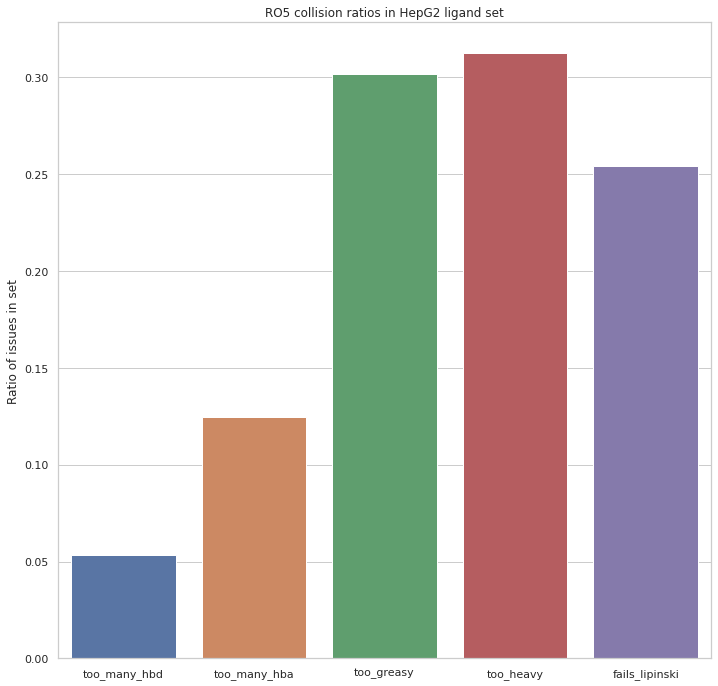

In [14]:
df['fails_lipinski'] = mtor_violates_lipinski
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df, ci=None)
    p.set_title("RO5 collision ratios in HepG2 ligand set")
    p.set_ylabel("Ratio of issues in set")

In [15]:
from rdkit.Chem import Crippen

def bad_greasyness_ghose(mol):
    logp = Descriptors.MolLogP(mol)
    return logp > 5.6 or logp < -0.4

# let's apply the filters and add them to the dataframe as we go
df['odd_greasyness'] = [bad_greasyness_ghose(l) for l in mtor_ligands]

def bad_refractivity_ghose(mol):
    ref = Crippen.MolMR(mol)
    return ref > 130 or ref < 40
df['odd_refractivity'] = [bad_refractivity_ghose(l) for l in mtor_ligands]

def bad_mw_ghose(mol):
    mw = rdescriptors.CalcExactMolWt(mol)
    return mw > 480 or mw < 180
df['odd_mass'] = [bad_mw_ghose(l) for l in mtor_ligands]

def bad_atomcount_ghose(mol):
    ac = mol.GetNumHeavyAtoms()
    return ac > 70 or ac < 20
df['odd_atomcount'] = [bad_atomcount_ghose(l) for l in mtor_ligands]

def violates_ghose(mol):
    return bad_greasyness_ghose(mol) or bad_refractivity_ghose(mol) or bad_mw_ghose(mol) or bad_atomcount_ghose(mol)
df['fails_ghose'] = [violates_ghose(l) for l in mtor_ligands]

def too_rotatable_veber(mol):
    return Chem.CalcNumRotatableBonds(mol) > 10
df['too_rotatable'] = [too_rotatable_veber(l) for l in mtor_ligands]

def too_large_psa_veber(mol):
    return rdescriptors.CalcTPSA(mol) > 140
df['excessive_psa'] = [too_large_psa_veber(l) for l in mtor_ligands]

def violates_veber(mol):
    return too_rotatable_veber(mol) or too_large_psa_veber(mol)
df['fails_veber'] = [violates_veber(l) for l in mtor_ligands]

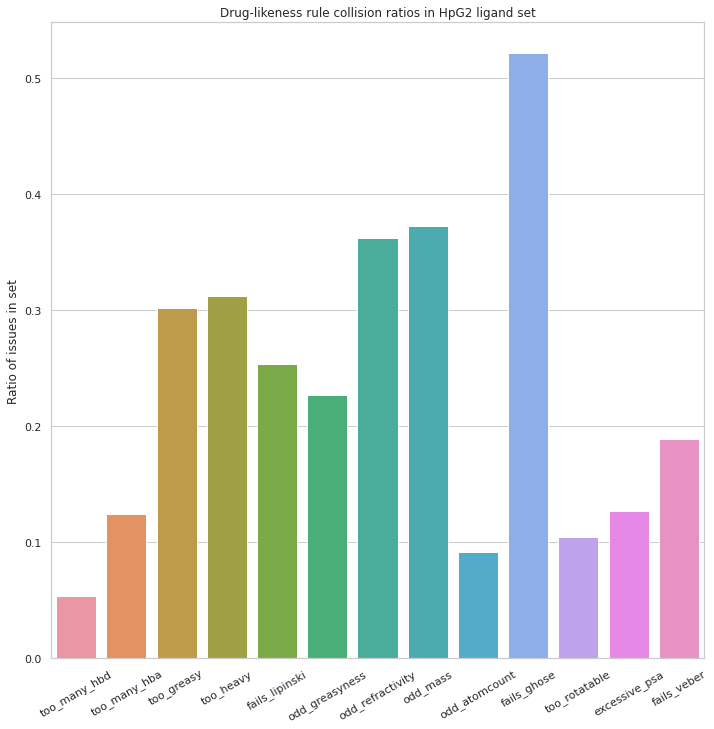

In [16]:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df, ci=None)
    p.set_title("Drug-likeness rule collision ratios in HpG2 ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30) # avoid ugly text clipping

In [17]:
df_drugbank = pd.DataFrame(
    data={'set':'DrugBank',
          'too_many_hbd': [too_many_hbd(l) for l in drugs],
          'too_many_hba': [too_many_hba(l) for l in drugs],
          'too_greasy': [too_greasy(l) for l in drugs],
          'too_heavy': [too_heavy(l) for l in drugs],
          'fails_lipinski': [violates_lipinski(l) for l in drugs],
          'odd_greasyness': [bad_greasyness_ghose(l) for l in drugs],
          'odd_refractivity': [bad_refractivity_ghose(l) for l in drugs],
          'odd_mass': [bad_mw_ghose(l) for l in drugs],
          'odd_atomcount': [bad_atomcount_ghose(l) for l in drugs],
          'fails_ghose': [violates_ghose(l) for l in drugs],
          'too_rotatable': [too_rotatable_veber(l) for l in drugs],
          'excessive_psa': [too_large_psa_veber(l) for l in drugs],
          'fails_veber': [violates_veber(l) for l in drugs]})
df_drugbank

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy,fails_lipinski,odd_greasyness,odd_refractivity,odd_mass,odd_atomcount,fails_ghose,too_rotatable,excessive_psa,fails_veber
0,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
1,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
2,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
3,DrugBank,True,True,False,True,True,True,True,True,True,True,True,True,True
4,DrugBank,False,True,False,True,True,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,DrugBank,False,False,False,False,False,False,True,True,True,True,False,False,False
7109,DrugBank,False,False,False,False,False,True,False,False,False,True,False,True,True
7110,DrugBank,True,True,False,True,True,False,True,True,True,True,True,True,True
7111,DrugBank,False,False,False,False,False,False,False,False,False,False,True,False,True


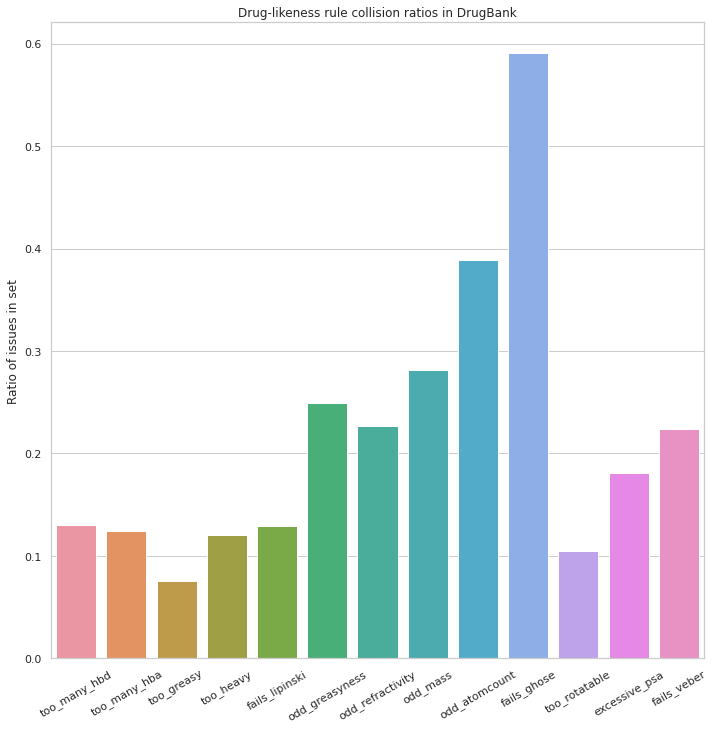

In [18]:
# let's visualize this monstrosity:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df_drugbank, ci=None)
    p.set_title("Drug-likeness rule collision ratios in DrugBank")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30) # avoid ugly text clipping